In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('.//raw_data//Job_hunting_stats.xlsx', skiprows=4, usecols="A:P")
df.drop(['Link', 'Name company'], axis=1, inplace=True)
df.head()

,Name position,Exp required,Application date,Application day,Application way,Application way comments,Response date,Response day,Call/Interview,Second interview,Technical interview,Technical assignment,Job Offer,Salary
0,Data Analyst,1-3 years,2020-11-25,Wednesday,Job application,Linkedin,2020-12-07,Monday,NaT,NaT,NaT,NaT,NaT,NaN
1,Junior Data Engineer,0 years,2020-12-01,Tuesday,DM to recrutier,Linkedin network,2020-12-02,Wednesday,NaT,NaT,NaT,NaT,NaT,NaN
2,Junior Data Engineer,0 years,2020-12-02,Wednesday,Linkedin application,Linkedin network,NaT,NaN,NaT,NaT,NaT,NaT,NaT,NaN
3,Data Analyst,3-5 years,2020-12-02,Wednesday,Job application,Linkedin,2020-12-04,Friday,NaT,NaT,NaT,NaT,NaT,NaN
4,Business Analyst,NaN,2020-12-01,Tuesday,Was contacted,Linkedin,2020-12-03,Thursday,2020-12-15,2020-12-22,NaT,NaT,2020-12-23,49896.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Name position             96 non-null     object        
 1   Exp required              92 non-null     object        
 2   Application date          96 non-null     datetime64[ns]
 3   Application day           96 non-null     object        
 4   Application way           96 non-null     object        
 5   Application way comments  96 non-null     object        
 6   Response date             58 non-null     datetime64[ns]
 7   Response day              58 non-null     object        
 8   Call/Interview            10 non-null     datetime64[ns]
 9   Second interview          6 non-null      datetime64[ns]
 10  Technical interview       1 non-null      datetime64[ns]
 11  Technical assignment      3 non-null      datetime64[ns]
 12  Job Offer               

In [4]:
df.to_csv('.//clean_data//job_hunt_stat.csv')

In [5]:
df = pd.read_csv('.//clean_data//job_hunt_stat.csv')

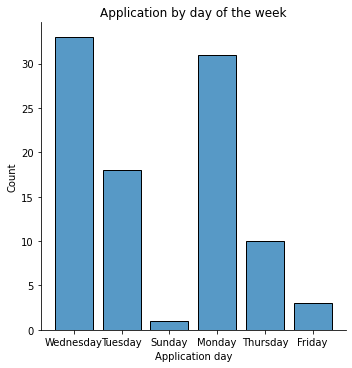

In [6]:
sns.displot(df, x='Application day', shrink=.8)
plt.title('Application by day of the week')
plt.show()

In [7]:
df_resp = df[df['Response day'].notnull()].drop('Unnamed: 0', axis=1)

In [8]:
for i in df['Application day'].unique():
    n = df.loc[df['Application day'] == i]['Application day'].count()/df_resp['Application day'].count()*100
    print(f'Ratio of applications sent on {i} is {int(round(n))}%.')

Ratio of applications sent on Wednesday is 57%.
Ratio of applications sent on Tuesday is 31%.
Ratio of applications sent on Sunday is 2%.
Ratio of applications sent on Monday is 53%.
Ratio of applications sent on Thursday is 17%.
Ratio of applications sent on Friday is 5%.


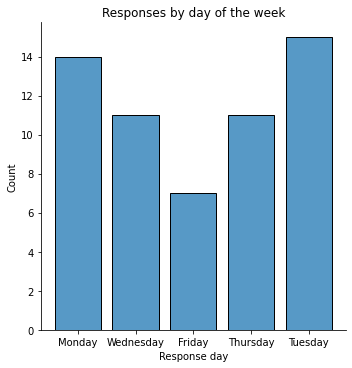

In [9]:
sns.displot(df_resp, x='Response day', shrink=.8)
plt.title('Responses by day of the week')
plt.show()

In [10]:
m = df_resp['Response day'].count()
n = df_resp['Response day'].count()/df['Application day'].count()*100
print(f'Number of responces received is {m}.')
print(f'Ratio of responses to total number of applications is {int(round(n))}%.')

Number of responces received is 58.
Ratio of responses to total number of applications is 60%.


In [11]:
for i in df_resp['Response day'].unique():
    n = df_resp.loc[df_resp['Response day'] == i]['Response day'].count()/df_resp['Response day'].count()*100
    print(f'Ratio of responces received on {i} is {int(round(n))}%.')

Ratio of responces received on Monday is 24%.
Ratio of responces received on Wednesday is 19%.
Ratio of responces received on Friday is 12%.
Ratio of responces received on Thursday is 19%.
Ratio of responces received on Tuesday is 26%.


In [12]:
m = df[df['Call/Interview'].notnull()].drop('Unnamed: 0', axis=1)['Call/Interview'].count()
n = m/df['Application day'].count()*100
print(f'Number of calls received is {m}.')
print(f'Ratio of calls received is {int(round(n))}%.')

Number of calls received is 10.
Ratio of calls received is 10%.


In [20]:
m = df['Response day'].count() - df['Call/Interview'].count()
n = m/df['Response day'].count()*100
print(f'Number of rejections received is {m}.')
print(f'Ratio of rejections to total number of responses is {int(round(n))}%.')

Number of rejections received is 48.
Ratio of rejections to total number of responses is 83%.


In [18]:
df['Response day'].count()

58

In [ ]:
# Exact period of job hunt
# Responces stats by application way (responses in general, then type of responses (pos or neg))